In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [51]:
with open("horizons_results.txt", "r") as file:
    lines = file.readlines()

start = next(i for i, line in enumerate(lines) if "$$SOE" in line) + 1
end = next(i for i, line in enumerate(lines) if "$$EOE" in line)
data_lines = lines[start:end]

parsed_data = [line.strip().split() for line in data_lines]

In [52]:
df = pd.DataFrame({
    "datetime": pd.to_datetime([f"{row[0]} {row[1]}" for row in parsed_data], format="%Y-%b-%d %H:%M"),
    "deldot": pd.to_numeric([row[31] for row in parsed_data], errors="coerce")
})

df_clean = df[df["deldot"] < 0].copy()

In [53]:
print(df[["datetime", "deldot"]].head(20))  # print first 20 entries}

              datetime     deldot
0  2025-07-02 00:00:00 -52.890284
1  2025-07-02 00:01:00 -52.890225
2  2025-07-02 00:02:00 -52.890160
3  2025-07-02 00:03:00 -52.890090
4  2025-07-02 00:04:00 -52.890013
5  2025-07-02 00:05:00 -52.889931
6  2025-07-02 00:06:00 -52.889842
7  2025-07-02 00:07:00 -52.889748
8  2025-07-02 00:08:00 -52.889647
9  2025-07-02 00:09:00 -52.889541
10 2025-07-02 00:10:00 -52.889428
11 2025-07-02 00:11:00 -52.889310
12 2025-07-02 00:12:00 -52.889185
13 2025-07-02 00:13:00 -52.889055
14 2025-07-02 00:14:00 -52.888918
15 2025-07-02 00:15:00 -52.888776
16 2025-07-02 00:16:00 -52.888627
17 2025-07-02 00:17:00 -52.888472
18 2025-07-02 00:18:00 -52.888311
19 2025-07-02 00:19:00 -52.888144


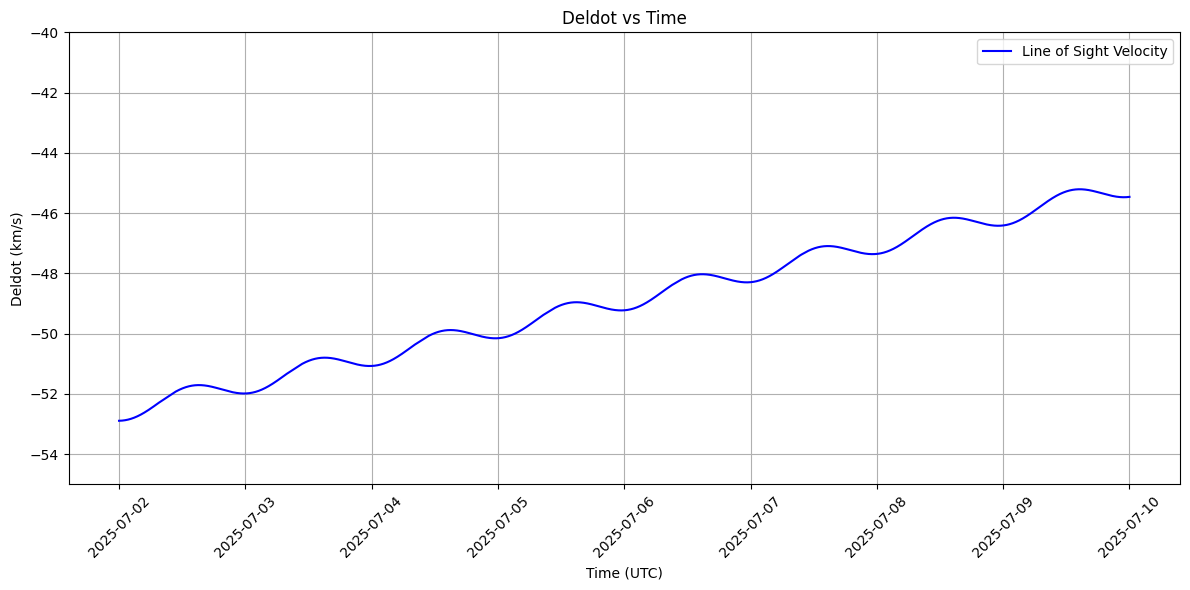

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(df_clean["datetime"], df_clean["deldot"], color='blue', label="Line of Sight Velocity")
plt.xlabel("Time (UTC)")
plt.ylabel("Deldot (km/s)")
plt.title("Deldot vs Time")
plt.grid(True)
plt.legend()

plt.xticks(rotation=45)

plt.ylim(-55, -40)
plt.tight_layout()
plt.show()

In [55]:
df_clean["acceleration_km_s2"] = df_clean["deldot"].diff() / 60
print(df_clean[["datetime", "deldot", "acceleration_km_s2"]].head(20))



              datetime     deldot  acceleration_km_s2
0  2025-07-02 00:00:00 -52.890284                 NaN
1  2025-07-02 00:01:00 -52.890225        9.800000e-07
2  2025-07-02 00:02:00 -52.890160        1.076667e-06
3  2025-07-02 00:03:00 -52.890090        1.178333e-06
4  2025-07-02 00:04:00 -52.890013        1.275000e-06
5  2025-07-02 00:05:00 -52.889931        1.375000e-06
6  2025-07-02 00:06:00 -52.889842        1.475000e-06
7  2025-07-02 00:07:00 -52.889748        1.573333e-06
8  2025-07-02 00:08:00 -52.889647        1.675000e-06
9  2025-07-02 00:09:00 -52.889541        1.773333e-06
10 2025-07-02 00:10:00 -52.889428        1.875000e-06
11 2025-07-02 00:11:00 -52.889310        1.973333e-06
12 2025-07-02 00:12:00 -52.889185        2.075000e-06
13 2025-07-02 00:13:00 -52.889055        2.175000e-06
14 2025-07-02 00:14:00 -52.888918        2.276667e-06
15 2025-07-02 00:15:00 -52.888776        2.376667e-06
16 2025-07-02 00:16:00 -52.888627        2.478333e-06
17 2025-07-02 00:17:00 -52.8

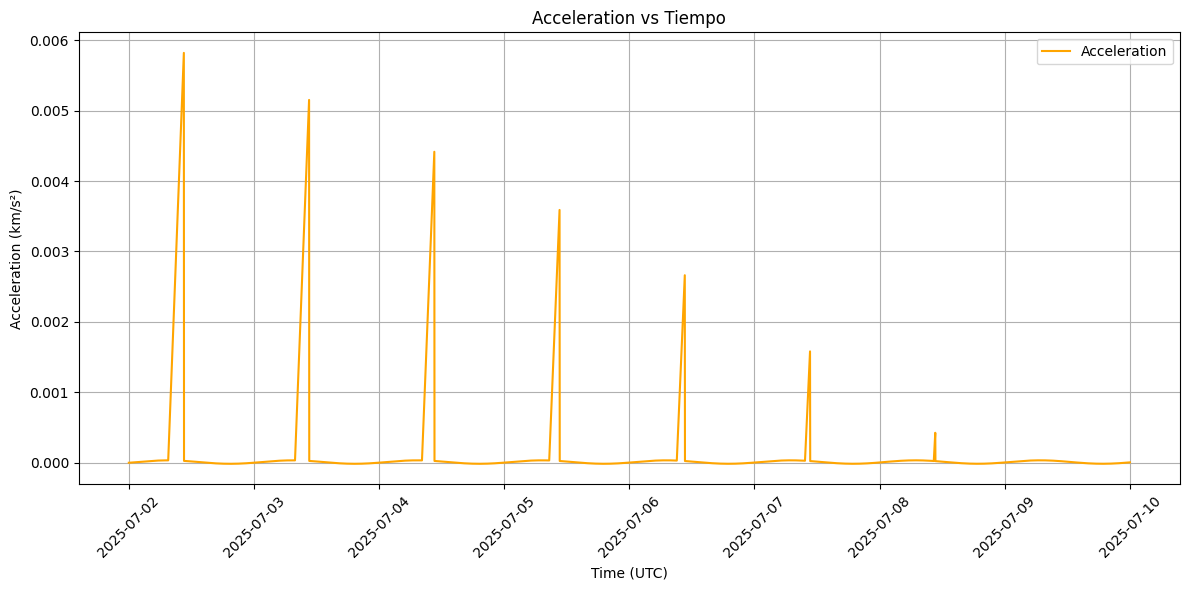

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_clean["datetime"], df_clean["acceleration_km_s2"], label="Acceleration", color='orange')
plt.xlabel("Time (UTC)")
plt.ylabel("Acceleration (km/s²)")
plt.title("Acceleration vs Time")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
